# **AAI 510 - Final Project (Group 5)**

# 1. Import the Dataset and Libraries

We will import the dataset using the ucimlrepo package from UCI Machine Learning Repository.

In [104]:
# Import necessary libraries
from ucimlrepo import fetch_ucirepo
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from scipy.stats.mstats import winsorize
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif

# Load dataset
cdc_diabetes_health_indicators = fetch_ucirepo(id=891)

# Target and feature variables
X = cdc_diabetes_health_indicators.data.features
y = cdc_diabetes_health_indicators.data.targets

# Combine into one dataframe
df = pd.concat([X, y], axis=1)

# View
df.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_binary
0,1,1,1,40,1,0,0,0,0,1,...,0,5,18,15,1,0,9,4,3,0
1,0,0,0,25,1,0,0,1,0,0,...,1,3,0,0,0,0,7,6,1,0
2,1,1,1,28,0,0,0,0,1,0,...,1,5,30,30,1,0,9,4,8,0
3,1,0,1,27,0,0,0,1,1,1,...,0,2,0,0,0,0,11,3,6,0
4,1,1,1,24,0,0,0,1,1,1,...,0,2,3,0,0,0,11,5,4,0


# 2. Exploratory Data Analysis

In this section, we will identify the relationships between the target (Diabetes_binary) and predictor variables.

In [3]:
# Print the shape of the data first
print("Dataset shape : "), df.shape

# Missing data and types
df.info()

# Descriptive stats
df.describe()

Dataset shape : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   HighBP                253680 non-null  int64
 1   HighChol              253680 non-null  int64
 2   CholCheck             253680 non-null  int64
 3   BMI                   253680 non-null  int64
 4   Smoker                253680 non-null  int64
 5   Stroke                253680 non-null  int64
 6   HeartDiseaseorAttack  253680 non-null  int64
 7   PhysActivity          253680 non-null  int64
 8   Fruits                253680 non-null  int64
 9   Veggies               253680 non-null  int64
 10  HvyAlcoholConsump     253680 non-null  int64
 11  AnyHealthcare         253680 non-null  int64
 12  NoDocbcCost           253680 non-null  int64
 13  GenHlth               253680 non-null  int64
 14  MentHlth              253680 non-null  int64
 15  PhysHlth         

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_binary
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,0.811420,...,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875,0.139333
std,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,0.391175,...,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148,0.346294
min,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000,0.000000
50%,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000,0.000000
75%,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000,0.000000
max,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000,1.000000


# Target Variable Distribution

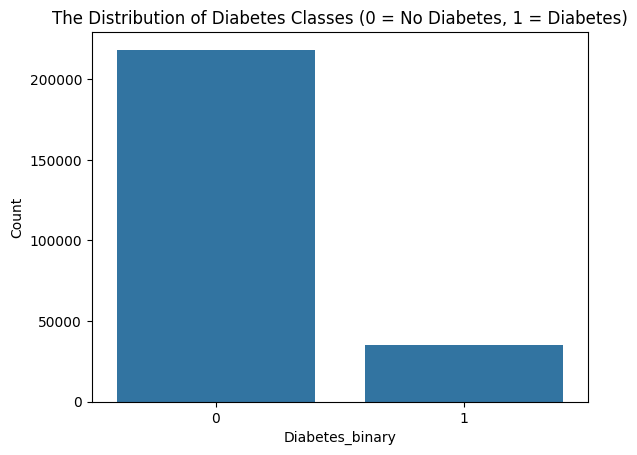

In [4]:
# Class balance
sns.countplot(x='Diabetes_binary', data=df)
plt.xlabel('Diabetes_binary')
plt.ylabel('Count')
plt.title('The Distribution of Diabetes Classes (0 = No Diabetes, 1 = Diabetes)')
plt.show()

Based of this graph, we can note that the dataset is imbalanced as majority of the records belong to class 0 - No diabetes. To minimize this, we can consider using SMOTE or a class weight adjustment in our model.

# Correlation Heatmap

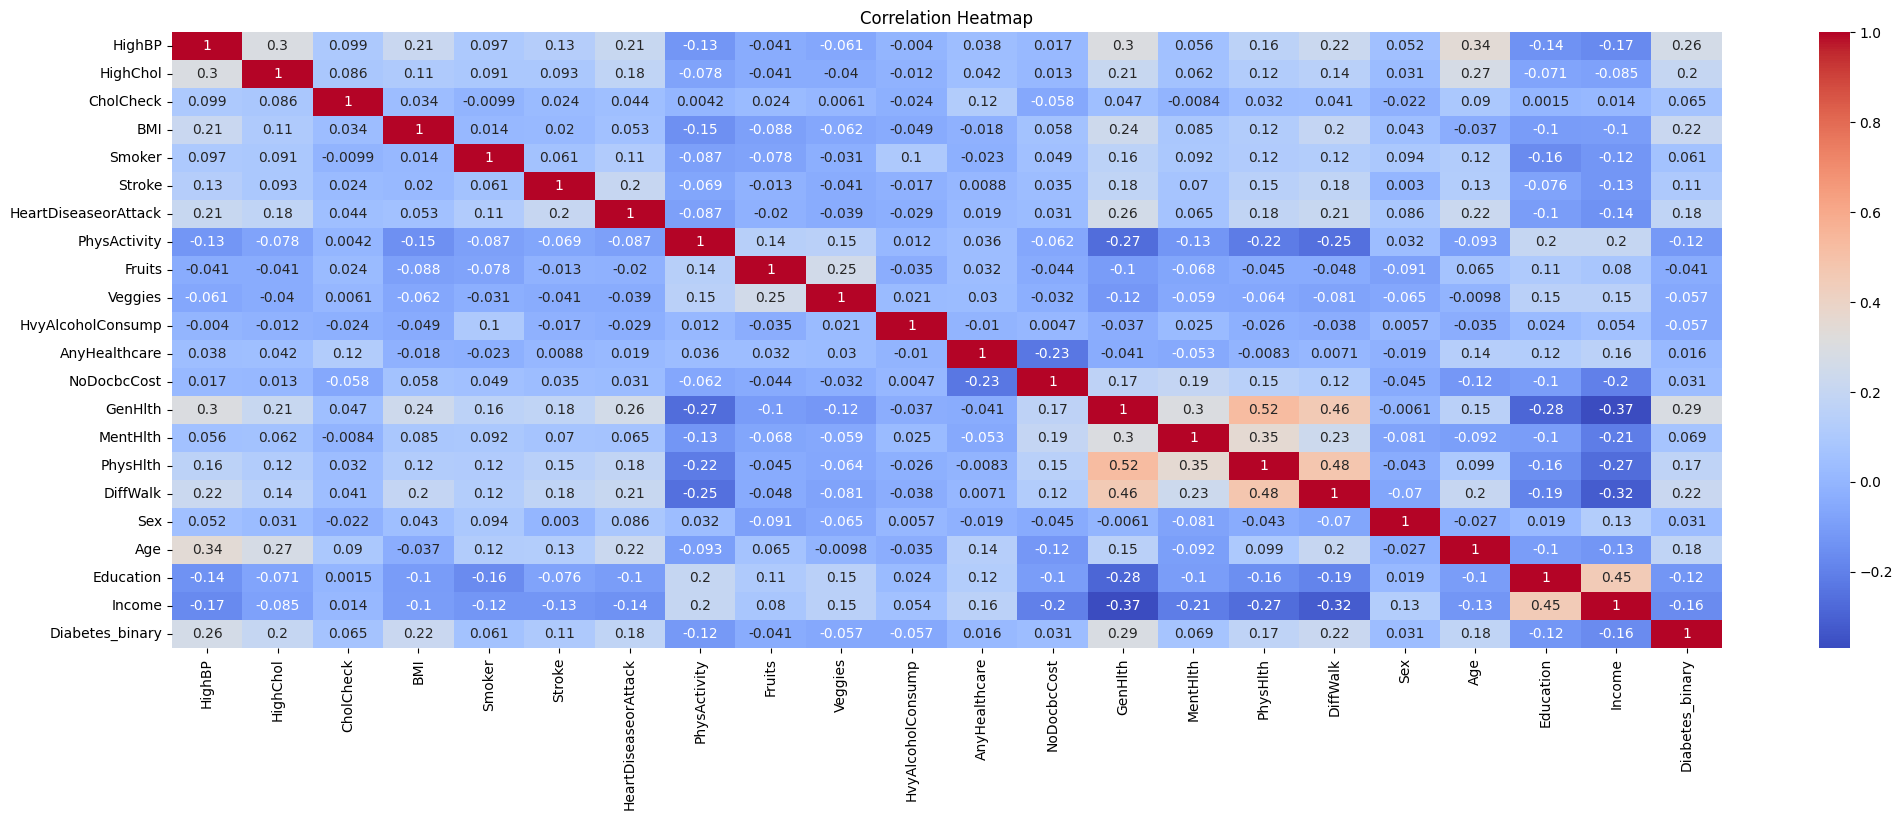

In [5]:
# Correlation heatmap with the target
plt.figure(figsize=(25, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

The correlation heatmap shows the 'Age', 'GenHlth', 'HighBP', and 'BMI' have positive correlations with diabetes status. Additionally, 'MentHlth' and 'PhysHlth' are correlated with general health, while variables correlated to smoking, diet, and alcohol consumption show weak correlation to diabetes.

# **3. Data Preparation & Feature Engineering**

We will deal with missing values, outliers, etc.

# Check for Missing Values

In [6]:
# Check dataset for missing values
missing_val = df.isnull().sum()
print(missing_val)

HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
Diabetes_binary         0
dtype: int64


We can note that there are no missing values.

# Check for Outliers

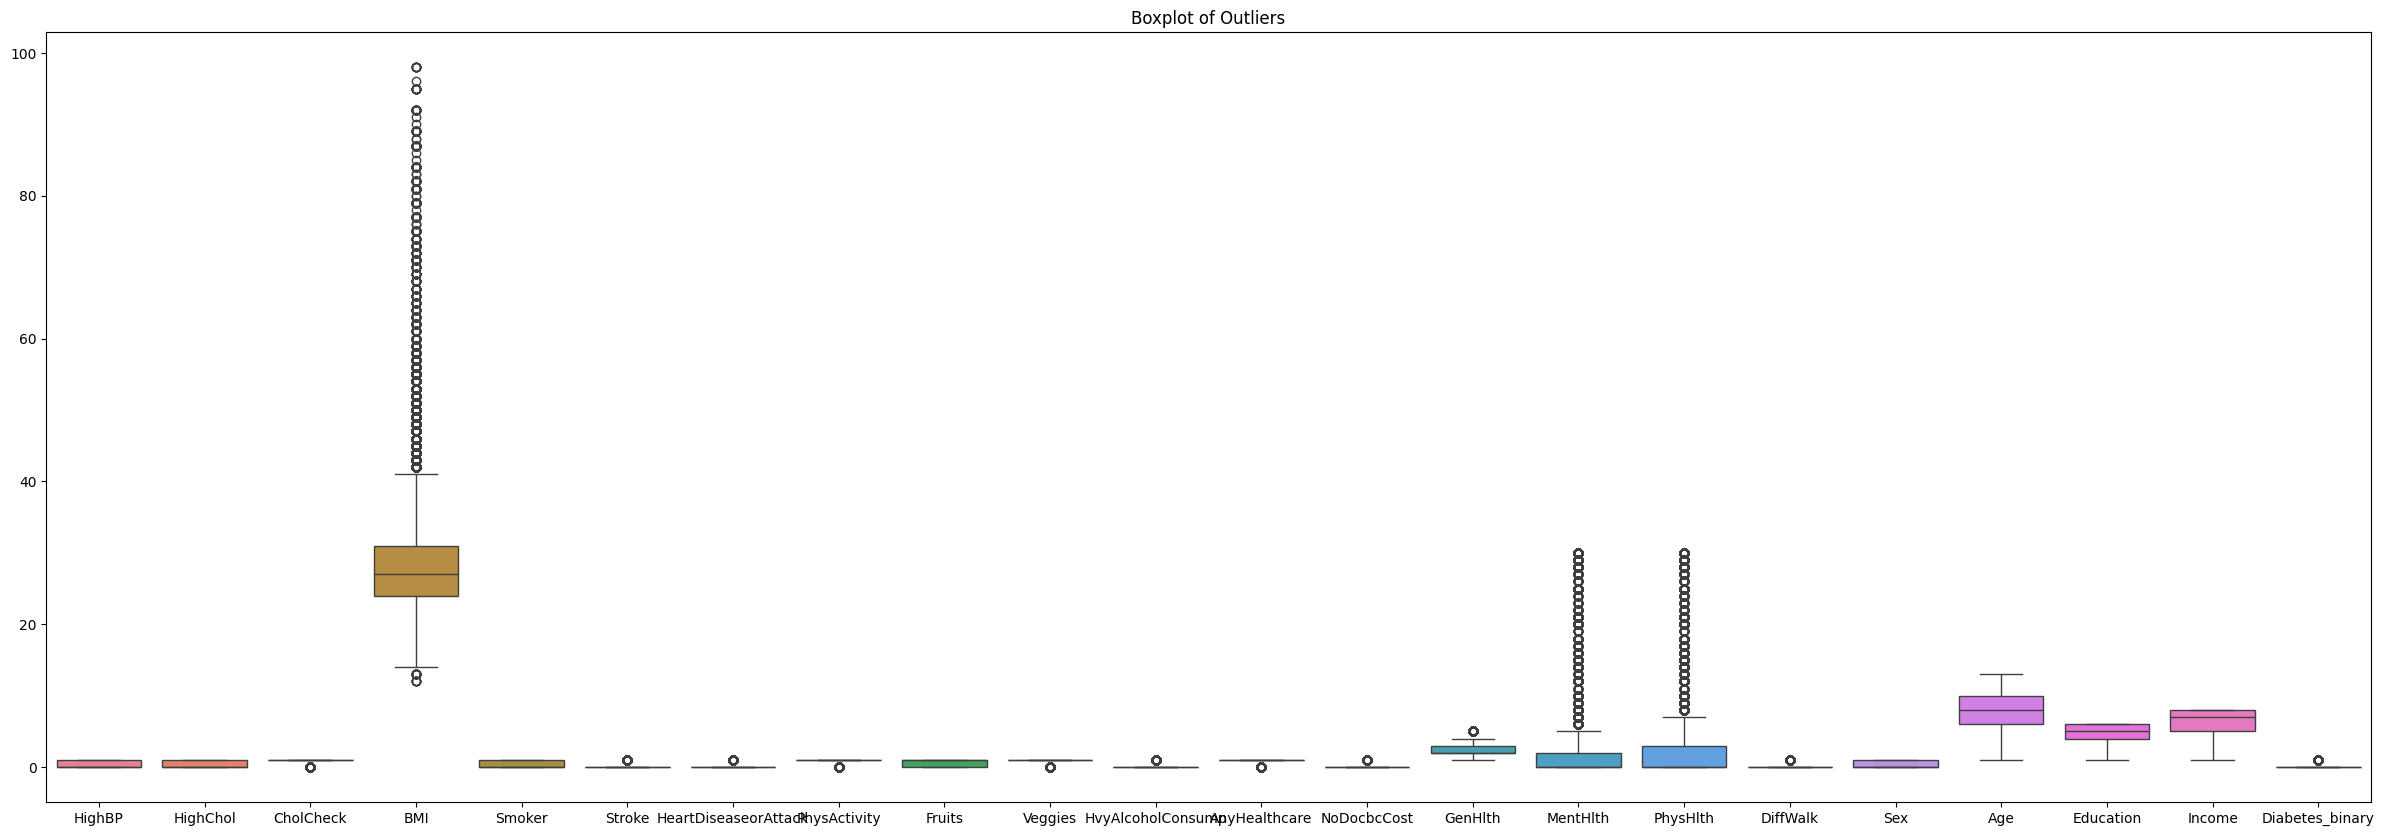

In [7]:
# Check for any outliers
plt.figure(figsize=(30, 10))
sns.boxplot(data=df)
plt.title('Boxplot of Outliers')
plt.show()

In this boxplot, 'BMI' seems to have a significant number of outliers.

Both 'MentHlth' and 'PhysHlth' show outliers, indicating a skewed distribution.

'GenHlth' has minor outliers.

'Age' shows some variability but no outliers.

'Education' and 'Income' do not show meaningful outliers.

Categorical features such as 'HighBP', 'HighChol', 'Smoker', 'Fruits', 'Sex', 'DiffWalk', 'Veggies', etc., do not seem to be meaningful.



# Log Transformation/Winsorize After Log

In [8]:
# Log transformation of the skewed numeric features with outliers
df['BMI'] = np.log1p(df['BMI'])
df['MentHlth'] = np.log1p(df['MentHlth'])
df['PhysHlth'] = np.log1p(df['PhysHlth'])

# Winsorize log transformed columns
df['BMI'] = winsorize(df['BMI'], limits=[0.01, 0.01])
df['MentHlth'] = winsorize(df['MentHlth'], limits=[0.01, 0.01])
df['PhysHlth'] = winsorize(df['PhysHlth'], limits=[0.01, 0.01])

# Drop weak correlated features
df.drop(columns=['Smoker', 'Fruits', 'Veggies', 'HvyAlcoholConsump'], inplace=True)

# Scale the numeric features
scaler = StandardScaler()

# Numeric columns to scale
col_scale = ['Age', 'Education', 'Income', 'BMI', 'MentHlth', 'PhysHlth']
df[col_scale] = scaler.fit_transform(df[col_scale])

# Check the structure of the columns
print("Structure of the columns:", df.shape)
print("Columns:", df.columns)

Structure of the columns: (253680, 18)
Columns: Index(['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'AnyHealthcare', 'NoDocbcCost',
       'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age',
       'Education', 'Income', 'Diabetes_binary'],
      dtype='object')


# Confirm Outliers

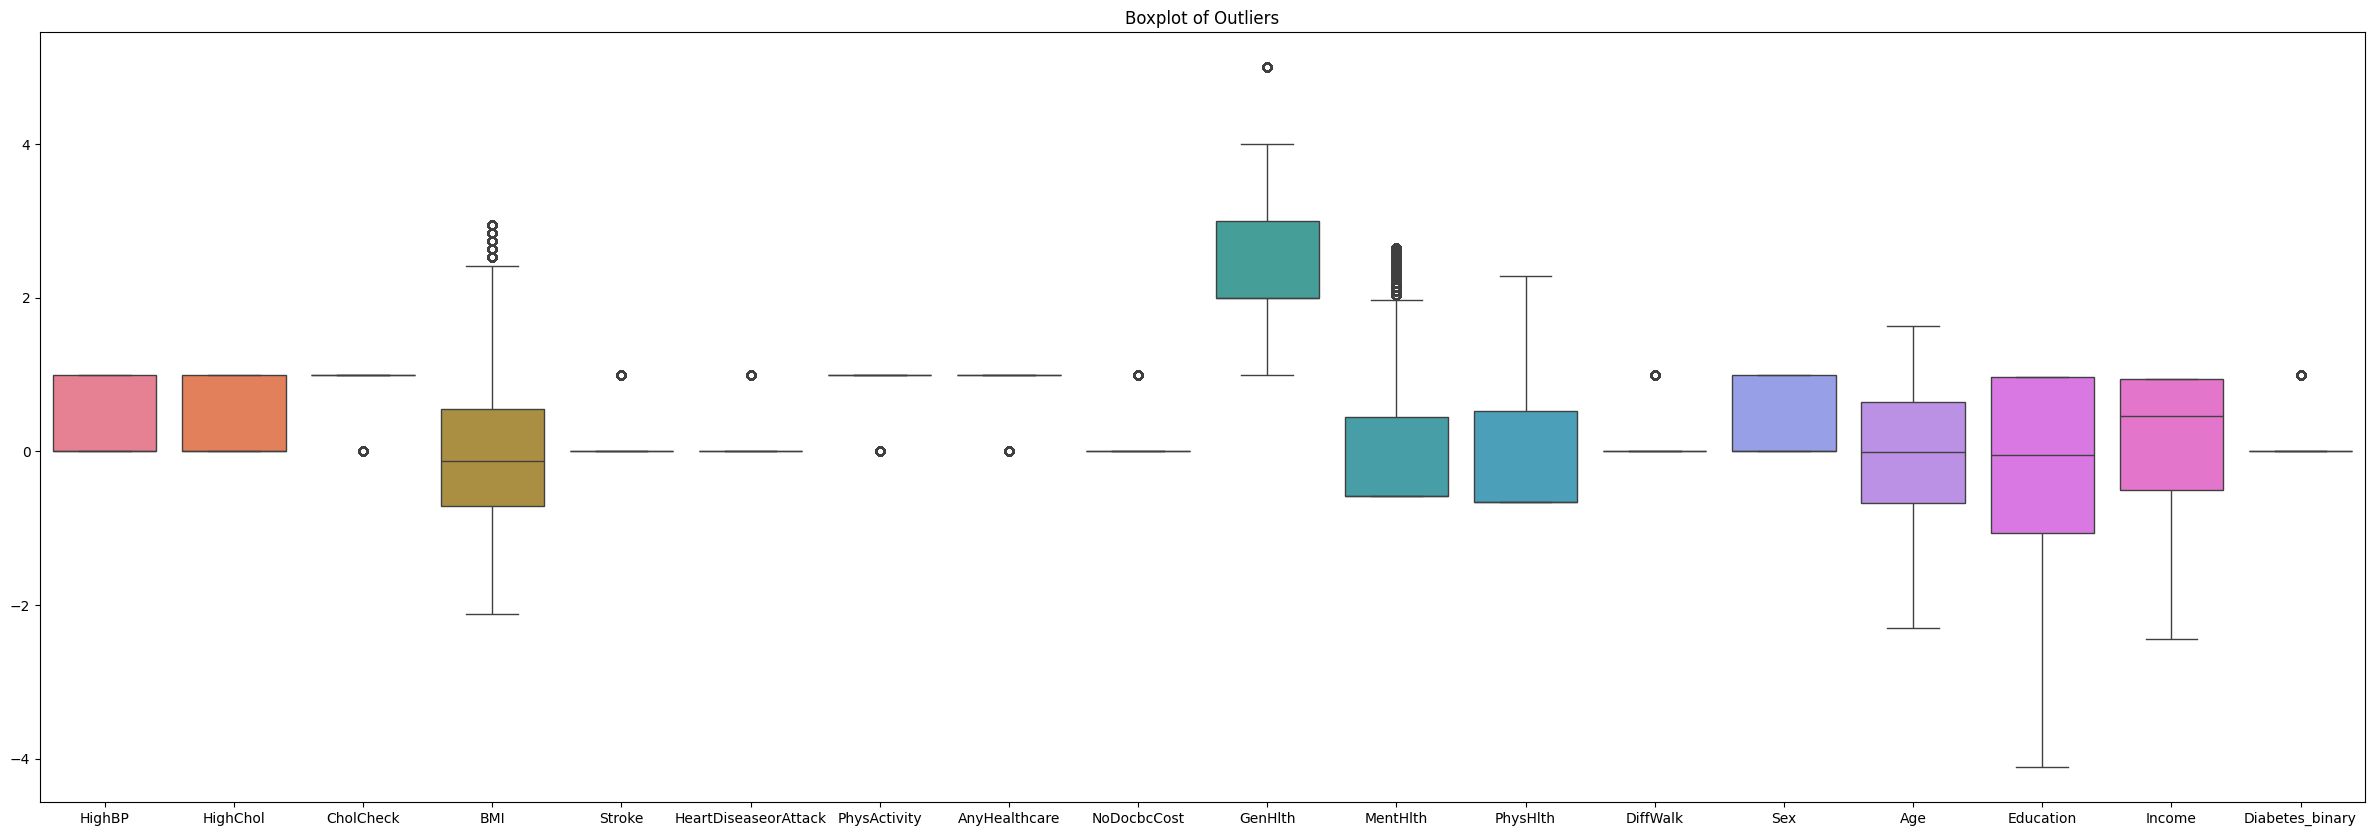

In [9]:
# Plot log transformed/scaled features
plt.figure(figsize=(30, 10))
sns.boxplot(data=df)
plt.title('Boxplot of Outliers')
plt.show()

This boxplot confirms that there are fewer outliers than before.

Since we are using a classification model outliers are not a problem as these models are robust to extreme values.

# Feature Selection

We will test feature correlation and add preference to features that are highly correlated with the target variable and take into account features that are highly correlated with each other. We will calculate Pearson correlations as well as Mutual Information scores to capture both potential linear and non-linear relationships between the features.

In [58]:
# First, we split data into train and test set
X = df[X.columns]
y = df[y.columns]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
train_df = pd.concat([X_train, y_train], axis=1)

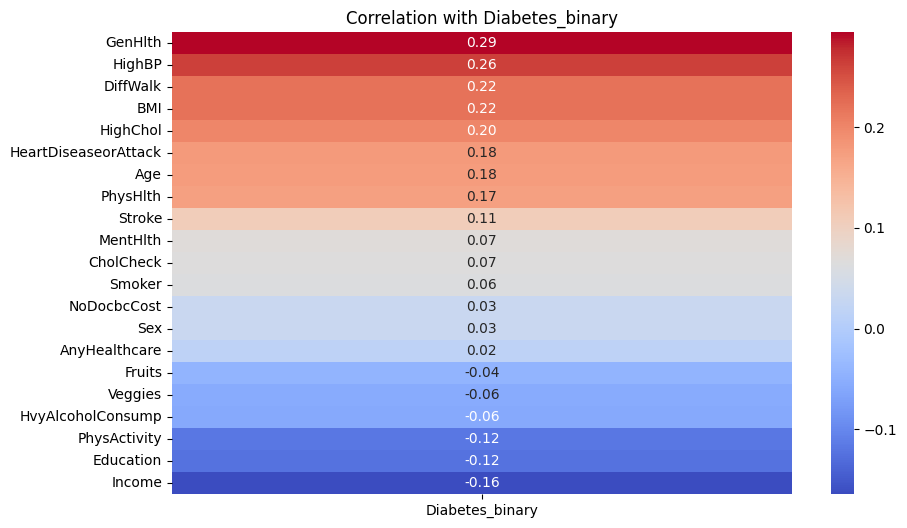

In [113]:
# Calculate the correlation matrix
corr_matrix_train = train_df.corr()
target = 'Diabetes_binary'

# Extract target variable correlations
target_corr = corr_matrix_train[target].drop(target).sort_values(ascending=False)

# Plot Heatmap of Correlation with Target
plt.figure(figsize=(10, 6))
sns.heatmap(target_corr.to_frame(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title(f'Correlation with {target}')
plt.show()

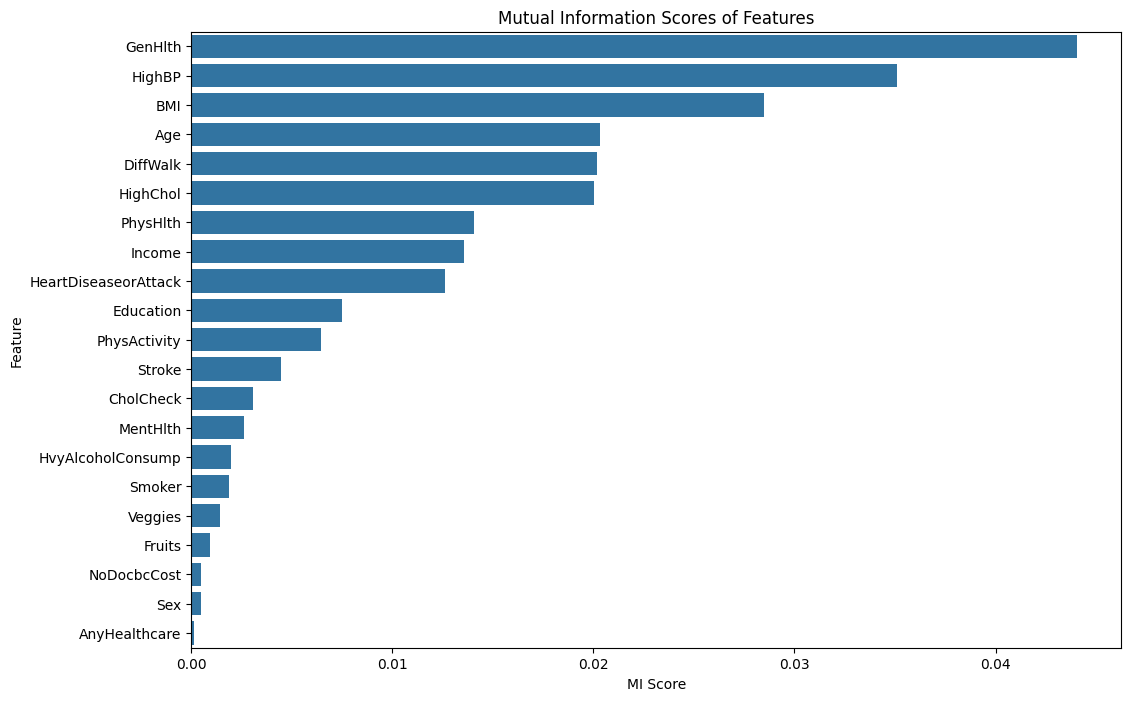

In [ ]:
# Calculate Mutual Information Scores

# Identify discrete features for score calculation
# BMI is the only continuous feature
df_boolean_mask = [col != 'BMI' for col in X_train.columns]

# Estimate mutual information for classification
mi_scores = mutual_info_classif(X_train, y_train.values.ravel(), 
                                discrete_features=df_boolean_mask, 
                                random_state=42)
mi_scores = pd.Series(mi_scores, index=X_train.columns).sort_values(ascending=False)

# Visualize the scores
plt.figure(figsize=(12, 8))
sns.barplot(x=mi_scores, y=mi_scores.index)
plt.title('Mutual Information Scores of Features')
plt.xlabel('MI Score')
plt.ylabel('Feature')
plt.show()

The Pearson Correlation (PC) scores capture linear relationships between the feature and the target variable. The Mutual Information (MI) scores measure dependencies between features, and capture both linear and non-linear relationships. Comparing the PC and the MI scores, we can select the most important features in an effort to reduce dimensionality and training efficiency. 

Features with both relatively strong PC and MI include GenHlth, HighBP, DiffWalk, BMI, HighChol, Age, PhysHlth, Income, and HeartDiseaseorAttack.

Features with relatively strong PC but low MI include PhysActivity, Education, and Stroke.

Features with relatively low PC and MI and strong candidates for removal include NoDocbcCost, HvyAlcoholConsump, AnyHealthcare, Veggies, Fruits, CholCheck, MentHlth, Sex, and Smoker.

Overall, features that show strong relevance either linearly or non-linearly will be kept while features with the relatively lowest scores in both PC and MI will be dropped.

In [108]:
# Filter out selected features from training set
selected_features = [
    'GenHlth',
    'HighBP',
    'DiffWalk',
    'BMI',
    'HighChol',
    'Age',
    'PhysHlth',
    'Income',
    'HeartDiseaseorAttack',
    'PhysActivity',
    'Education',
    'Stroke'
]

X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Print Shape Before and After Feature Selection
print("Original X_train shape:", X_train.shape)
print("New X_train_selected shape:", X_train_selected.shape)
print("Original X_test shape:", X_test.shape)
print("New X_test_selected shape:", X_test_selected.shape)

Original X_train shape: (202944, 21)
New X_train_selected shape: (202944, 12)
Original X_test shape: (50736, 21)
New X_test_selected shape: (50736, 12)


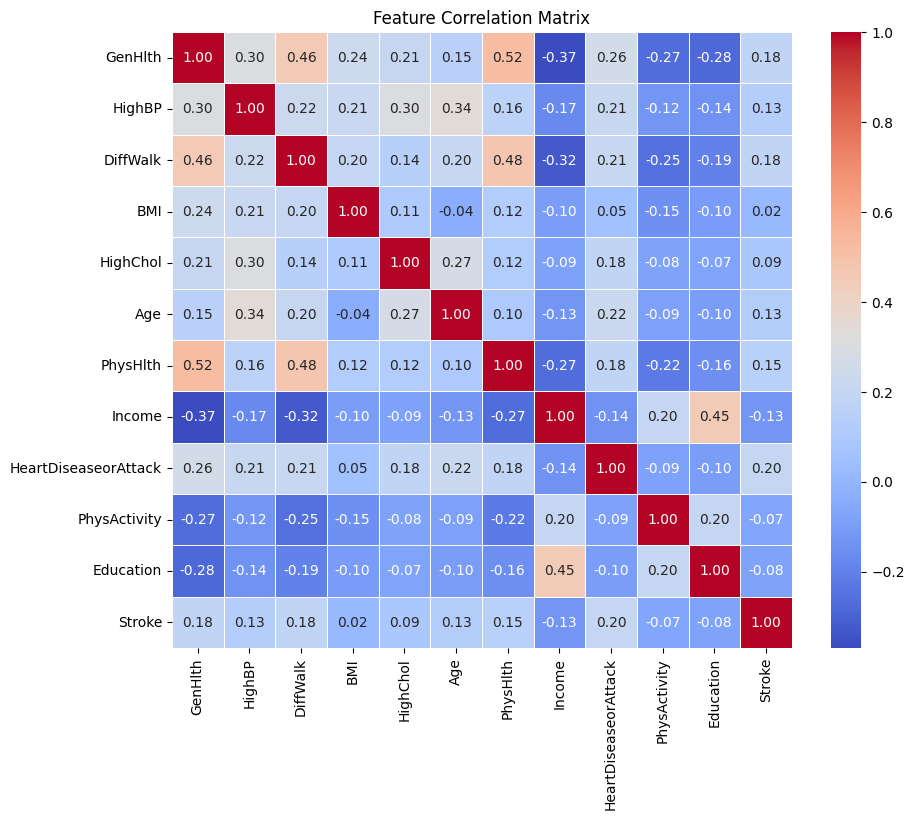

In [ ]:
# Plot Heatmap of Selected Feature Correlation
corr_matrix_selected = X_train_selected.corr()
plt.figure(figsize=(10, 8)) # Adjust figure size if needed
sns.heatmap(corr_matrix_selected, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Feature Correlation Matrix')
plt.show()

# Target Class Balancing

In [ ]:
# Oversample minority class
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print('Target value counts before balancing:\n', y_train.value_counts())
print('\nTarget value counts after balancing:\n', y_train_resampled.value_counts())

Target value counts before balancing:
 Diabetes_binary
0                  174667
1                   28277
Name: count, dtype: int64

Target value counts after balancing:
 Diabetes_binary
0                  174667
1                  174667
Name: count, dtype: int64
